In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [3]:
feature_vector_length = 784
num_classes = 10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Feature shape: (784,)


In [4]:
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

In [5]:
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8111 - loss: 0.6921 - val_accuracy: 0.9501 - val_loss: 0.1746
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9581 - loss: 0.1521 - val_accuracy: 0.9649 - val_loss: 0.1238
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9712 - loss: 0.1012 - val_accuracy: 0.9687 - val_loss: 0.1038
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9802 - loss: 0.0711 - val_accuracy: 0.9721 - val_loss: 0.0908
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9852 - loss: 0.0532 - val_accuracy: 0.9734 - val_loss: 0.0881
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9891 - loss: 0.0399 - val_accuracy: 0.9749 - val_loss: 0.0866
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9922 - loss: 0.0294 - val_accuracy: 0.9748 - val_loss: 0.0860
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9946 - loss: 0.0220 - val_accu

In [7]:
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9759 - loss: 0.0830
Test results - Loss: 0.07359498739242554 - Accuracy: 0.9793999791145325


In [8]:
predictions = model.predict(X_test[:5])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Y_test[:5], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


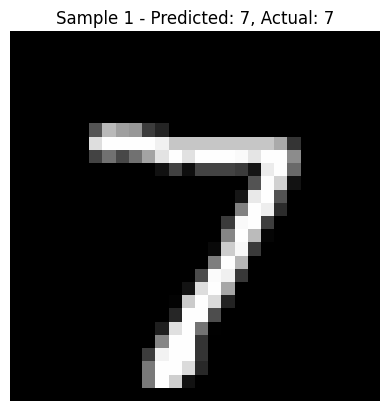

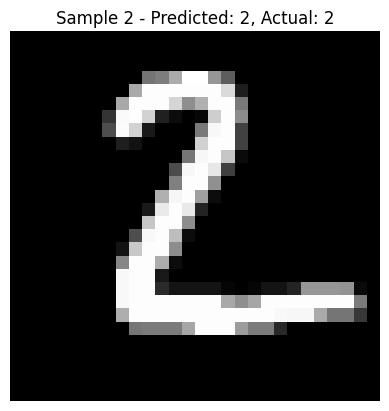

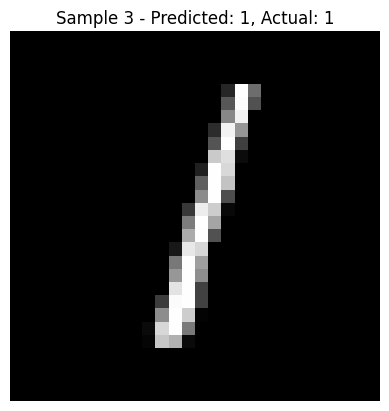

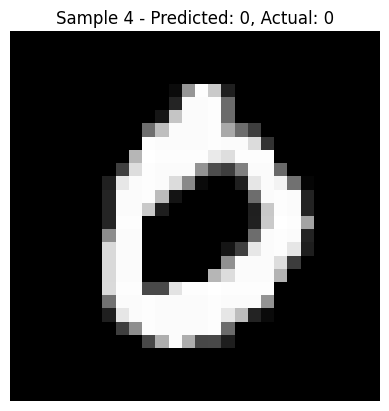

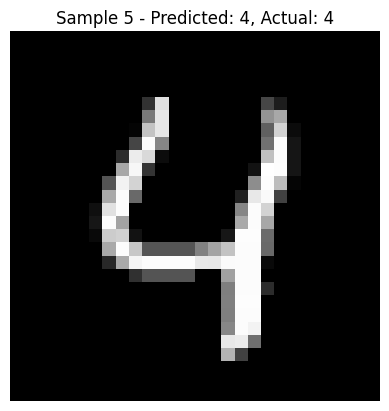

In [9]:
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Sample {i+1} - Predicted: {predicted_classes[i]}, Actual: {true_classes[i]}")
    plt.axis('off')
    plt.show()